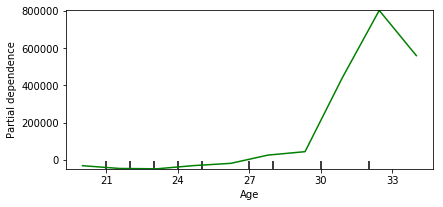

In [42]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

cols_to_use = ['Age', 'Seasons', 'Ovrl', 'TOI/GP', 'PTS/GP']

def get_some_data():
    data = pd.read_csv('nhl_data.csv')
    #clean_dataset(data)
    y = data.Salary
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y
    

X, y = get_some_data()



my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model, 
                                   features=[0], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

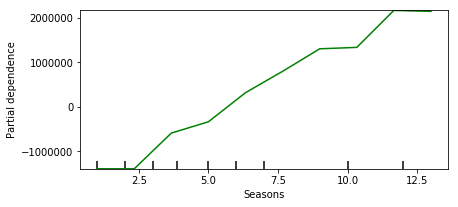

In [43]:
my_plots = plot_partial_dependence(my_model, 
                                   features=[1], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

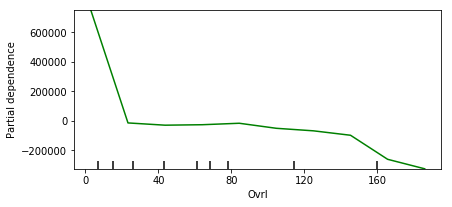

In [44]:
my_plots = plot_partial_dependence(my_model, 
                                   features=[2], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

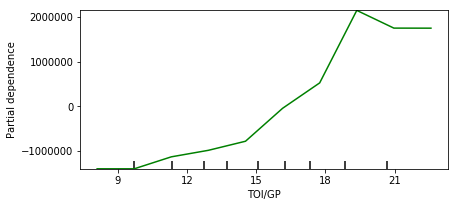

In [38]:
my_plots = plot_partial_dependence(my_model, 
                                   features=[3], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

In [39]:
my_plots = plot_partial_dependence(my_model, 
                                   features=[4], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

ValueError: All entries of features must be less than len(feature_names) = 4, got 4.